In [21]:
import matplotlib.pyplot
import numpy
import torch

from neuralcompression.data import Kodak
from neuralcompression.models import FactorizedPriorAutoencoder
import skimage.data
import skimage.transform
import torchvision.transforms
from PIL import Image
import urllib.request

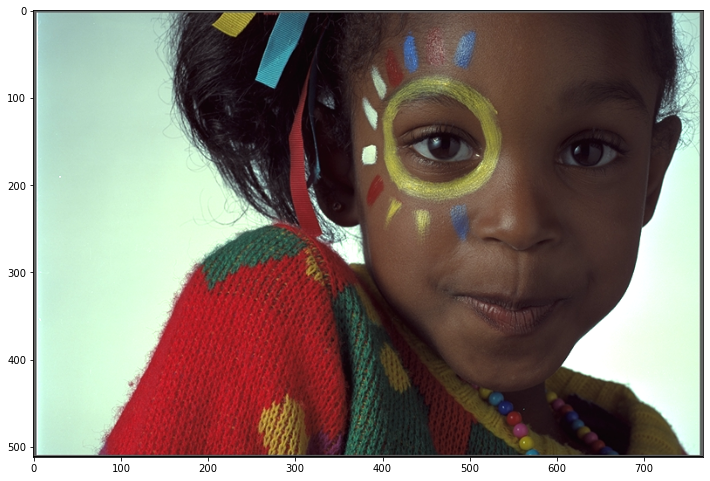

In [22]:
x = Image.open("../docs/examples/image.png")

transform = torchvision.transforms.Compose([
    torchvision.transforms.PILToTensor(),
    torchvision.transforms.ConvertImageDtype(torch.float32),
])

x = transform(x).unsqueeze(0)

matplotlib.pyplot.figure(figsize=(12, 18))

matplotlib.pyplot.imshow(x.squeeze().permute(1, 2, 0))

In [23]:
network = FactorizedPriorAutoencoder()

url = "https://dl.fbaipublicfiles.com/neuralcompression/models/factorized_prior_vimeo_90k_mse_128_192_0_025.pth"

state_dict = torch.hub.load_state_dict_from_url(url)

network.load_state_dict(state_dict, strict=False)

In [24]:
with torch.no_grad():
    strings, broadcast_size = network.compress(x)

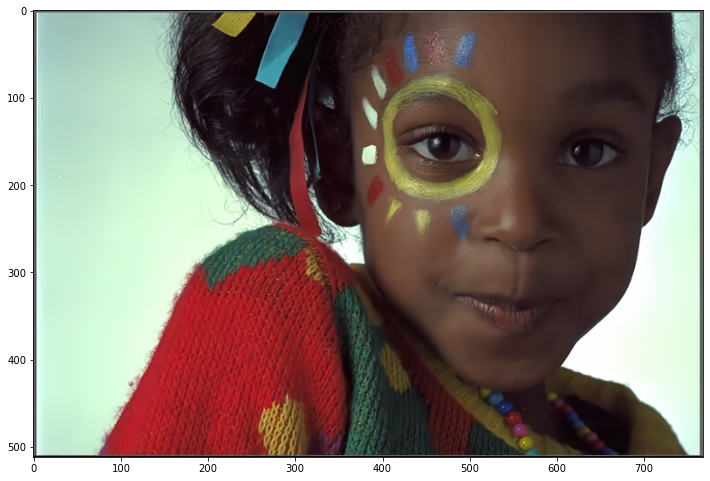

In [25]:
with torch.no_grad():
    x_hat = network.decompress(strings, broadcast_size)

matplotlib.pyplot.figure(figsize=(12, 18))

matplotlib.pyplot.imshow(x_hat.squeeze().permute(1, 2, 0))

matplotlib.pyplot.show()

## Evaluation

### PSNR

In [26]:
import math

from torch import Tensor

import torch.nn.functional as F


def psnr(x: Tensor, x_hat: Tensor) -> float:
    return -10 * math.log10(F.mse_loss(x, x_hat).item())

psnr(x, x_hat)

33.959993123056144

33.959993123056144